In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [7]:
dataset=pd.read_csv('D:\Analytics vidhya\crimes.csv')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6838751 entries, 0 to 6838750
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.0+ GB


In [26]:
import datetime
from datetime import datetime
from datetime import date
from datetime import time
df['date']=[d.date() for d in df['Date']]
df['time']=[d.time() for d in df['Date']]


In [21]:
df=dataset[1:100]

In [24]:
df['Date']=pd.to_datetime(df['Date'])

In [30]:
df.drop(['Date'],axis=1,inplace=True)

In [31]:
df

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,time
1,5821105,HN629243,083XX S COTTAGE GROVE AVE,2027,NARCOTICS,POSS: CRACK,OTHER,True,False,632,...,18,1183009.0,1849965.0,2007,02/28/2018 03:56:25 PM,41.743504,-87.605018,"(41.743503863, -87.60501807)",2007-10-04,21:22:00
2,5821107,HN630465,014XX N LEAMINGTON AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, GROUNDS",False,False,2533,...,08B,1141772.0,1909093.0,2007,02/28/2018 03:56:25 PM,41.906619,-87.754656,"(41.9066185, -87.754655732)",2007-09-28,14:40:00
3,5821109,HN605476,022XX S SPRINGFIELD AVE,2027,NARCOTICS,POSS: CRACK,STREET,True,False,1013,...,18,1150734.0,1888882.0,2007,02/28/2018 03:56:25 PM,41.850987,-87.722263,"(41.85098667, -87.722263023)",2007-09-22,21:21:48
4,5821111,HN630272,023XX W FULTON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1332,...,07,1160812.0,1901952.0,2007,02/28/2018 03:56:25 PM,41.886649,-87.684912,"(41.886649244, -87.684912154)",2007-10-05,08:00:00
5,5821120,HN630477,005XX N STATE ST,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,False,False,1834,...,06,1176280.0,1903770.0,2007,02/28/2018 03:56:25 PM,41.891303,-87.628055,"(41.891303157, -87.628055281)",2007-09-28,16:30:00
6,5821122,HN630408,059XX W HIGGINS AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,1622,...,07,1135773.0,1933101.0,2007,02/28/2018 03:56:25 PM,41.972608,-87.776120,"(41.972607969, -87.776119561)",2007-10-05,02:30:00
7,5821125,HN630208,079XX S ADA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,612,...,14,1168709.0,1852088.0,2007,02/28/2018 03:56:25 PM,41.749650,-87.657353,"(41.749649847, -87.657352992)",2007-10-05,00:00:00
8,5821128,HN630472,068XX S INDIANA AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,322,...,07,1178771.0,1859794.0,2007,02/28/2018 03:56:25 PM,41.770573,-87.620248,"(41.770573119, -87.620247743)",2007-10-04,22:00:00
9,5821129,HN630238,066XX S GREEN ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,723,...,26,1171780.0,1860859.0,2007,02/28/2018 03:56:25 PM,41.773652,-87.645843,"(41.773651806, -87.645842711)",2007-10-05,11:20:00
10,5821130,HN630495,038XX N ELSTON AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,SMALL RETAIL STORE,False,False,1732,...,14,1152215.0,1925499.0,2007,02/28/2018 03:56:25 PM,41.951438,-87.715860,"(41.951438195, -87.715860084)",2007-10-05,00:00:00


In [14]:
x=dataset.iloc[:,[3,4]].values


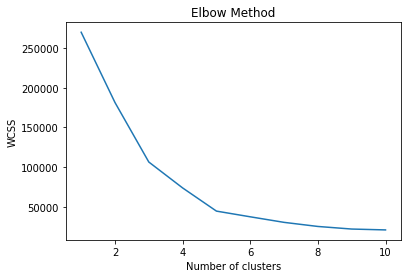

In [6]:
#Using the Elbow Method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    



In [7]:
#Applying kmeans to dataset
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)



In [8]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

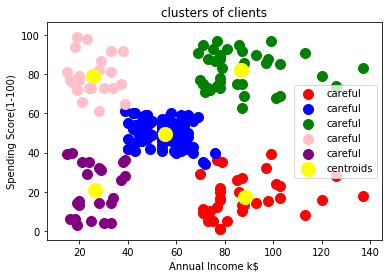

In [18]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='careful')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='careful')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='careful')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='pink',label='careful')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='purple',label='careful')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='centroids')
plt.title('clusters of clients')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()
